# Optimization methods. Effect of input normalization

In this tutorial, we get familiar with optimization methods:
- gradient descent
- Newton's method
- momentum momentum

We will also see how input normalization can affect the difficulty of the optimization problem.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
%matplotlib inline

In [3]:
def contour_plot(fun, w1, w2, levels=None, linestyles=None):
    W1, W2 = np.meshgrid(w1, w2)
    F = np.array([
        fun(np.array([_w1, _w2]))[0]
        for _w1, _w2 in zip(W1.flat, W2.flat)
    ]).reshape(W1.shape)
    CS = ax.contour(W1, W2, F, levels=levels, linestyles=linestyles)
    ax.set_ylabel('$w_2$')
    ax.set_xlabel('$w_1$')

# Tiny example

## Data

Suppose we have a dataset that contains two examples:
$x_1 = (2, 2)$, $y_1 = 2$,
$x_2 = (2, 0)$, $y_2 =0$

In [4]:
x = np.column_stack((
    np.array([2, 2]),
    np.array([2, 0]),
))
y = np.array([2, 0])

Our model is a simple linear neuron with two inputs:
$$
f(x) = w^T x = w_1 x_1 + w_2 x_2
$$

We can estimate the parameters of the model by maximizing the likelihood:
$$
  w_1, w_2 \leftarrow \arg \min
  \sum_{i=1}^2 \left(y_i - f(x_i) \right)^2
$$
which is the problem of optimizing a quadratic function:
$$
  c(w) = \frac{1}{2} w^T A w - b^T w
$$

In [5]:
def obj_fn(w, x, y):
    """
    Args:
      w (array): Array of weights of size (2)
    """
    c = 0.5 * np.square(y - np.dot(w, x)).sum()
    g = -np.dot(x, (y - np.dot(w, x)))
    H = np.dot(x, x.T)
    return c, g, H

## Contour plot

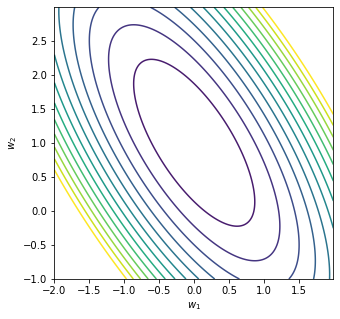

In [6]:
w1 = np.arange(-2, 2, 0.01)
w2 = np.arange(-1, 3, 0.01)
fig, ax = plt.subplots(figsize=(5, 5))
contour_plot(lambda w: obj_fn(w, x, y), w1, w2, levels=np.arange(0, 20, 1.5))

# Gradient descent

## Gradient

Let us first visualize the gradient.

(-1.0, 2.9900000000000038)

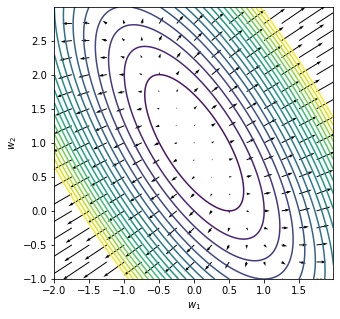

In [7]:
w1g = np.arange(-2, 2+0.01, 0.25)
w2g = np.arange(-1, 3+0.01, 0.25)
W1g, W2g = np.meshgrid(w1g, w2g)

G = np.array([
    obj_fn(np.array([_w1, _w2]), x, y)[1]
    for _w1, _w2 in zip(W1g.flat, W2g.flat)
])  # (N*M, 2)

fig, ax = plt.subplots(figsize=(5, 5))
contour_plot(lambda w: obj_fn(w, x, y), w1, w2, levels=np.arange(0, 20, 1))
ax.quiver(W1g.flat, W2g.flat, G[:, 0], G[:, 1], scale=50, scale_units='xy', angles='xy')
ax.set_xlim([w1[0], w1[-1]])
ax.set_ylim([w2[0], w2[-1]])

To minimize the function, we need to go in the direction opposite to the gradient. Let us visualize that.

(-1.0, 2.9900000000000038)

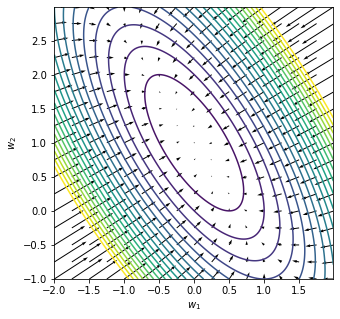

In [8]:
# Negative gradient
fig, ax = plt.subplots(figsize=(5, 5))
contour_plot(lambda w: obj_fn(w, x, y), w1, w2, levels=np.arange(0, 20, 1))
ax.quiver(W1g.flat, W2g.flat, -G[:, 0], -G[:, 1], scale=50, scale_units='xy', angles='xy')
ax.set_xlim([w1[0], w1[-1]])
ax.set_ylim([w2[0], w2[-1]])

## Gradient descent

We update the parameters in the direction opposite to the gradient:
$$
  w \leftarrow w - \eta \nabla_f (w)
$$
where $\eta$ is the step size (learning rate).

We reduce the error but do not end up at the minimum, so we need to iterate
$$
  w_{t+1} = w_t - \eta_t \nabla_f (w_t)
$$


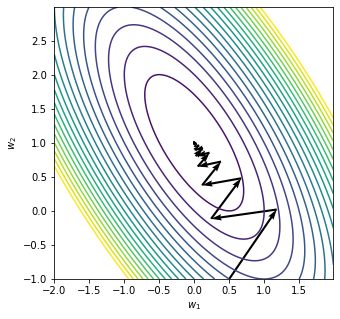

In [9]:
fig, ax = plt.subplots(figsize=(5, 5))
contour_plot(lambda w: obj_fn(w, x, y), w1, w2, levels=np.arange(0, 20, 1))

w = np.array([0.5, -1])
lrate = 0.17
for i in range(100):
    c, g, H = obj_fn(w, x, y)
    dw = -lrate * g
    ax.quiver(w[0], w[1], dw[0], dw[1], scale=1, scale_units='xy', angles='xy')
    wnew = w + dw
    w = wnew

### Side note:

For a quadratic function, we can find the minimum in one step using Newton's method:
$$
w_{t+1} = w_t - H_t^{-1} \nabla_f(w_t)
$$
where $H$ is the Hessian matrix.

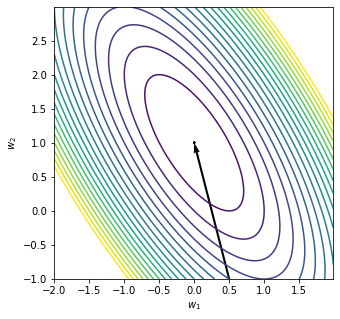

In [10]:
fig, ax = plt.subplots(figsize=(5, 5))
contour_plot(lambda w: obj_fn(w, x, y), w1, w2, levels=np.arange(0, 20, 1))

w = np.array([0.5, -1])
lrate = 0.1
for i in range(20):
    c, g, H = obj_fn(w, x, y)
    dw = -np.linalg.solve(H, g)
    ax.quiver(w[0], w[1], dw[0], dw[1], scale=1, scale_units='xy', angles='xy')
    wnew = w + dw
    w = wnew

### Gradient descent with a small learning rate

With a small learning rate, the optimization process may be too slow.

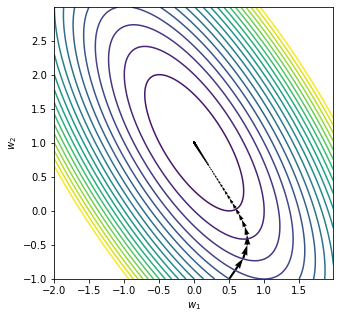

In [11]:
fig, ax = plt.subplots(figsize=(5, 5))
contour_plot(lambda w: obj_fn(w, x, y), w1, w2, levels=np.arange(0, 20, 1))

w = np.array([0.5, -1])
lrate = 0.05
for i in range(200):
    c, g, H = obj_fn(w, x, y)
    dw = -lrate * g
    ax.quiver(w[0], w[1], dw[0], dw[1], scale=1, scale_units='xy', angles='xy')
    wnew = w + dw
    w = wnew

### Gradient descent with a large learning rate

With a large learning rate, the trajectory oscillates and the optimization process can even diverge.

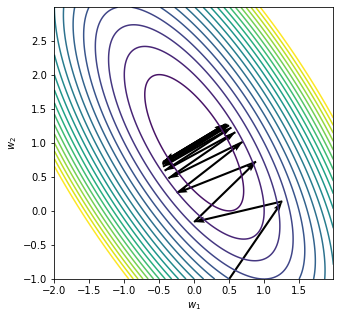

In [12]:
fig, ax = plt.subplots(figsize=(5, 5))
contour_plot(lambda w: obj_fn(w, x, y), w1, w2, levels=np.arange(0, 20, 1))

w = np.array([0.5, -1])
lrate = 0.19
for i in range(20):
    c, g, H = obj_fn(w, x, y)
    dw = -lrate * g
    ax.quiver(w[0], w[1], dw[0], dw[1], scale=1, scale_units='xy', angles='xy')
    wnew = w + dw
    w = wnew

# Momentum method

In the momentum method, we aggregate negative gradients in momentum $m$ which is then used to update the parameters:
\begin{align*}
m_{t+1} &= \alpha m_t - \eta_t g_t
\\
w_{t+1} &= w_t + m_{t+1}
\end{align*}

The optimization process becomes more consistent, the trajectory oscillates less.

Let us try $\alpha=0.5$.

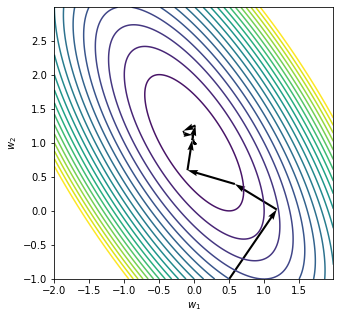

In [13]:
# alpha = 0.5
fig, ax = plt.subplots(figsize=(5, 5))
contour_plot(lambda w: obj_fn(w, x, y), w1, w2, levels=np.arange(0, 20, 1))

w = np.array([0.5, -1])
lrate = 0.17
m = np.zeros(2)
alpha = 0.5
for i in range(100):
    c, g, H = obj_fn(w, x, y)
    m = dw = alpha * m -lrate * g
    ax.quiver(w[0], w[1], dw[0], dw[1], scale=1, scale_units='xy', angles='xy')
    wnew = w + dw
    w = wnew

Let us inrease $\alpha$ to 0.85.

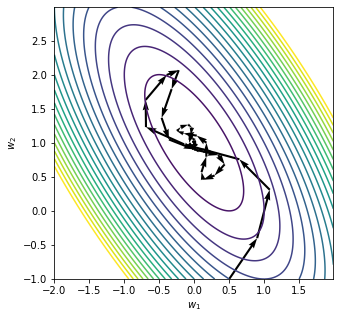

In [14]:
# alpha = 0.85
fig, ax = plt.subplots(figsize=(5, 5))
contour_plot(lambda w: obj_fn(w, x, y), w1, w2, levels=np.arange(0, 20, 1))

w = np.array([0.5, -1])
lrate = 0.1
m = np.zeros(2)
alpha = 0.85
for i in range(100):
    c, g, H = obj_fn(w, x, y)
    m = dw = alpha * m -lrate * g
    ax.quiver(w[0], w[1], dw[0], dw[1], scale=1, scale_units='xy', angles='xy')
    wnew = w + dw
    w = wnew

The intuition behind the momentum method: A ball moving on the error surface: The location of the ball
represents the value of the parameters ($w_1$, $w_2$)

- At $t=0$, the ball follows the gradient

- Once it has velocity, it no longer does steepest descent. Its momentum makes it keep going in the previous direction.

The momentum method damps oscillations in directions of high curvature (by combining
gradients with opposite signs) and it builds up speed in directions with a gentle but consistent gradient.

# Minimization of a non-quadratic los function

Let us now consider a slightly more complex model: two layers with one neuron in each layer:
\begin{align*}
f(x) &= w_2 w_1 x
\end{align*}

The dataset contains one example: $\{x=1, y=1.5\}$

We add weight decay regularization which yields the objective function
$$
  c(w_1, w_2) = (w_1 w_2 - 1.5)^2+0.04(w_1^2+w_2^2)
$$
We need to minimize $c$ wrt $w_1$ and $w_2$.

In [15]:
def obj_fn(w):
    decay = 0.04
    f = np.square(w[0] * w[1] - 1.5) + decay * np.square(w).sum()
    g = np.array([
        2 * (w[0] * w[1] - 1.5) * w[1] + 2 * decay * w[0],
        2 * (w[0] * w[1] - 1.5) * w[0] + 2 * decay * w[1],
    ])
    H = np.array([
        [2*w[1]*w[1] + 2*decay,      2*(2*w[0]*w[1] - 1.5)],
        [2*(2*w[0]*w[1] - 1.5),      2 * w[0] * w[0] + 2 * decay]
    ])
    return f, g, H

Let us make a contour plot of the loss function.

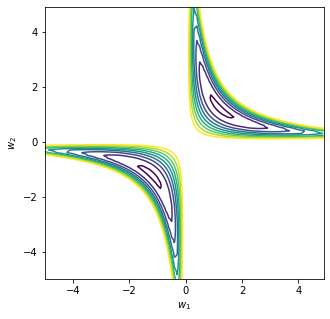

In [16]:
fig, ax = plt.subplots(figsize=(5, 5))
w1 = np.arange(-5, 5, 0.1)
w2 = np.arange(-5, 5, 0.1)
contour_plot(obj_fn, w1, w2, levels=np.arange(0.15, 1.8, 0.2))

We make the same plot in 3d.

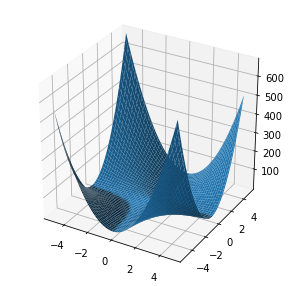

In [17]:
fig = plt.figure(figsize=(5, 5))
ax = fig.gca(projection='3d')
W1, W2 = np.meshgrid(w1, w2)
F = np.array([
    obj_fn(np.array([_w1, _w2]))[0]
    for _w1, _w2 in zip(W1.flat, W2.flat)
]).reshape(W1.shape)
surf = ax.plot_surface(W1, W2, F)

You can see two equivalent local minima because $c(w_1, w_2) = c(-w_1, -w_2)$.

Note: The loss function that is minimized when training deep neural networks contains multiple local minima. Many of them are equivalent because the same loss can be obtained by swapping any pair of neurons in the same layer.

## Quadratic approximation

Let us zoom in to one of the local minima.

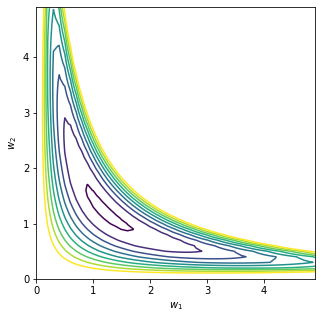

In [18]:
fig, ax = plt.subplots(figsize=(5, 5))
w1 = np.arange(0, 5, 0.1)
w2 = np.arange(0, 5, 0.1)
contour_plot(obj_fn, w1, w2, levels=np.arange(0.15, 1.8, 0.2))

Locally the error surface is well approximated by a quadratic function:
$$
c(w) \approx c(w_t) + \nabla^T (w - w_t) + \frac{1}{2}(w - w_t)^T H (w - w_t).
$$
where $H$ is the matrix of second-order derivatives (called Hessian):
\begin{align*}
H &= \begin{pmatrix}\frac{\partial^2c}{\partial w_1 \partial w_1} & \frac{\partial^2c}{\partial w_1 \partial w_2}
\\
\frac{\partial^2c}{\partial w_2 \partial w_1} & \frac{\partial^2c}{\partial w_2 \partial w_2}\end{pmatrix}
\end{align*}

In [19]:
w0 = np.array([1.2, 1.2])
def quadratic_approximation(w):
    f, g, H = obj_fn(w0)
    dw = w - w0
    return f + np.inner(g, dw) + 0.5 * np.inner(dw, np.dot(H, dw)), None, None

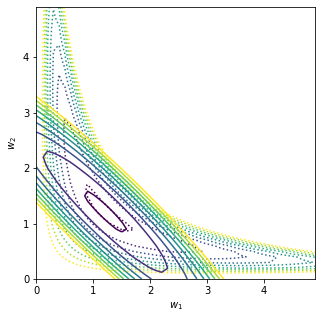

In [20]:
fig, ax = plt.subplots(figsize=(5, 5))
w1 = np.arange(0, 5, 0.1)
w2 = np.arange(0, 5, 0.1)
contour_plot(obj_fn, w1, w2, levels=np.arange(0.15, 1.8, 0.2), linestyles='dotted')
contour_plot(quadratic_approximation, w1, w2, levels=np.arange(0.15, 1.8, 0.2))

## Newton's method

Newton's method iterates the following update rule:
$$
w_{t+1} = w_t - H_t^{-1} \nabla_f(w_t)
$$
where $H$ is the Hessian matrix.

Let us Newton's method to minimize our loss function.

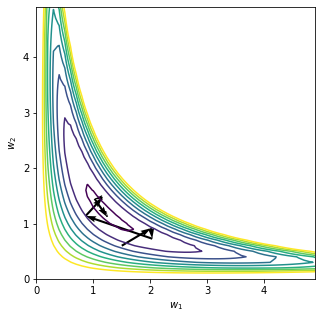

In [21]:
fig, ax = plt.subplots(figsize=(5, 5))
contour_plot(obj_fn, w1, w2, levels=np.arange(0.15, 1.8, 0.2))

w = np.array([1.5, 0.6])
lrate = 0.1
for i in range(20):
    c, g, H = obj_fn(w)
    dw = -np.linalg.solve(H, g)
    ax.quiver(w[0], w[1], dw[0], dw[1], scale=1, scale_units='xy', angles='xy')
    wnew = w + dw
    w = wnew

# Input normalization

Consider the first toy model we optimized in this notebook. The model is a simple linear neuron with two inputs
$$
f(x) = w^T x = w_1 x_1 + w_2 x_2
$$

Our dataset contains two examples:
$x_1 = (2, 2)$, $y_1 = 2$,
$x_2 = (2, 0)$, $y_2 =0$

We estimate the parameters of the model by maximizing the likelihood:
$$
  w_1, w_2 \leftarrow \arg \min
  \sum_{i=1}^2 \left(y_i - f(x_i) \right)^2
$$
which is equivalent to minimizing
$$
  c(w) = \frac{1}{2} w^T A w - b^T w
$$

In [22]:
def obj_fn(w, x, y):
    """
    Args:
      w (array): Array of weights of size (2)
    """
    c = 0.5 * np.square(y - np.dot(w, x)).sum()
    g = -np.dot(x, (y - np.dot(w, x)))
    H = np.dot(x, x.T)
    return c, g, H

## Shifting the inputs

Let us subtract a constant one from the input and visualize the error surface.

In [23]:
x = np.column_stack((
    np.array([2, 2]),
    np.array([2, 0]),
)) - 1
y = np.array([2, 0])

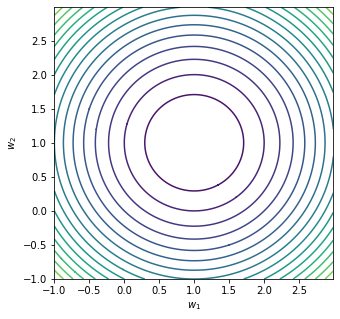

In [24]:
w1 = np.arange(-1, 3, 0.01)
w2 = np.arange(-1, 3, 0.01)
fig, ax = plt.subplots(figsize=(5, 5))
contour_plot(lambda w: obj_fn(w, x, y), w1, w2, levels=np.arange(0, 10, 0.5))

We can see that the Hessian of the loss function has two equal eigenvalues which improves the speed of convergence of the gradient descent method. We can see that regardless of the location, the direction of the negative gradient points towards the minimum. In fact, by choosing the optimal learning rate, we can find the minimum in one step.

(-1.0, 2.9900000000000038)

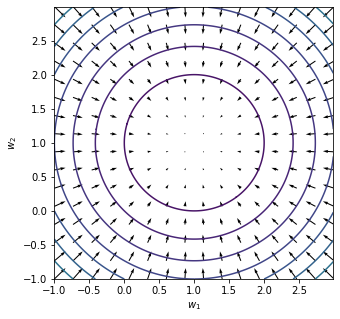

In [25]:
# Visualize negative gradients
w1g = np.linspace(-1, 3, 16)
w2g = np.linspace(-1, 3, 16)
W1g, W2g = np.meshgrid(w1g, w2g)

G = np.array([
    obj_fn(np.array([_w1, _w2]), x, y)[1]
    for _w1, _w2 in zip(W1g.flat, W2g.flat)
])  # (N*M, 2)

fig, ax = plt.subplots(figsize=(5, 5))
contour_plot(lambda w: obj_fn(w, x, y), w1, w2, levels=np.arange(0, 20, 1))
ax.quiver(W1g.flat, W2g.flat, -2 * G[:, 0], -2 * G[:, 1], scale=50, scale_units='xy', angles='xy')
ax.set_xlim([w1[0], w1[-1]])
ax.set_ylim([w2[0], w2[-1]])

Now let us shift the inputs by adding a constant 3.

In [26]:
x = np.column_stack((
    np.array([2, 2]),
    np.array([2, 0]),
)) + 3
y = np.array([2, 0])

We can see that the eigenvalues of the Hessian are substantially different which slows down the convergence of the gradient descent.

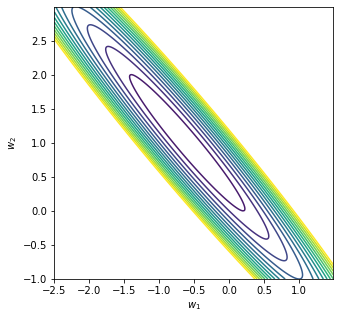

In [27]:
w1 = np.arange(-2.5, 1.5, 0.01)
w2 = np.arange(-1, 3, 0.01)
fig, ax = plt.subplots(figsize=(5, 5))
contour_plot(lambda w: obj_fn(w, x, y), w1, w2, levels=np.arange(0, 15, 1))

## Scaling

Let us now scale the inputs by dividing the first dimension by 4 and multiplying the second dimention by 4.

In [28]:
x = np.column_stack((
    np.array([1, 1]),
    np.array([1, -1]),
)) * np.array([0.25, 4])
y = np.array([2, 0])

We can see that it has negative effect on the optimization landscape.

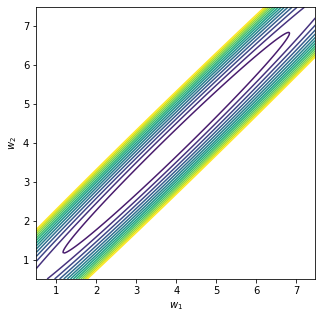

In [29]:
w1 = np.arange(0.5, 7.5, 0.02)
w2 = np.arange(0.5, 7.5, 0.02)
fig, ax = plt.subplots(figsize=(5, 5))
contour_plot(lambda w: obj_fn(w, x, y), w1, w2, levels=np.arange(0, 15, 1))

# Adam

In [30]:
x = np.column_stack((
    np.array([2, 2]),
    np.array([2, 0]),
))
y = np.array([2, 0])

def obj_fn(w, x, y):
    """
    Args:
      w (array): Array of weights of size (2)
    """
    c = 0.5 * np.square(y - np.dot(w, x)).sum()
    g = -np.dot(x, (y - np.dot(w, x)))
    H = np.dot(x, x.T)
    return c, g, H

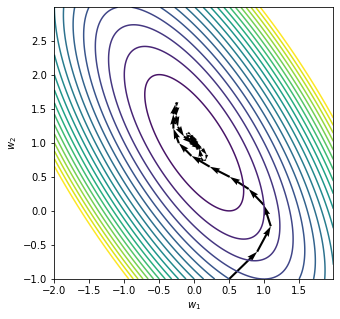

In [31]:
w1 = np.arange(-2, 2, 0.01)
w2 = np.arange(-1, 3, 0.01)
fig, ax = plt.subplots(figsize=(5, 5))
contour_plot(lambda w: obj_fn(w, x, y), w1, w2, levels=np.arange(0, 20, 1))

w = np.array([0.5, -1])


learning_rate = 0.4
beta_1 = 0.8
beta_2 = 0.8
epsilon = 10e-8

ms = np.zeros(w.shape)
vs = np.zeros(w.shape)

for t in range(1, 50+1):
    cost, gradient, _ = obj_fn(w, x, y)

    # Moving average of first and second order moments
    m_iter = beta_1 * ms + (1. - beta_1) * gradient
    v_iter = beta_2 * vs + (1. - beta_2) * np.square(gradient)

    # Bias corrected first and second order moments (ref paper)
    m_iter_corrected = m_iter / (1. - (beta_1 ** t))
    v_iter_corrected = v_iter / (1. - (beta_2 ** t))

    # Compute the update for the parameter
    dw = - learning_rate * m_iter_corrected / (np.sqrt(v_iter_corrected) + epsilon)
    ax.quiver(w[0], w[1], dw[0], dw[1], scale=1, scale_units='xy', angles='xy')

    # Update parameter
    wnew = w + dw
    w = wnew
    
    # Update the values of the first and second order moments
    ms = m_iter
    vs = v_iter